In [ ]:
import seaborn as sns

In [ ]:
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
titanic = titanic.drop(columns = ['deck'])

In [ ]:
titanic  = titanic.dropna()

In [ ]:
titanic.shape

(712, 14)

In [ ]:
titanic['agerange'] = (titanic['age']/10).astype(int)*10

In [ ]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,agerange
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,20
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,30
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,20
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,30
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,Queenstown,no,False,30
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True,20
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True,10
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True,20


In [ ]:
titanic_pivot = titanic.pivot_table(index = 'class', columns = 'agerange', values = 'survived',aggfunc = 'count')

In [ ]:
titanic_pivot

agerange,0,10,20,30,40,50,60,70,80
class,,,,,,,,,
First,3,18,34,49,37,27,12,3,1
Second,17,18,53,48,18,15,3,1,0
Third,42,66,133,69,34,6,3,2,0


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import numpy as np

In [ ]:
np.arange(0.5,len(titanic_pivot.columns),1)

array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5])

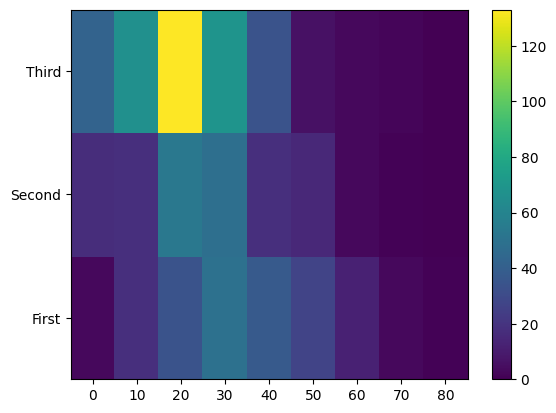

In [ ]:
plt.pcolor(titanic_pivot)
plt.colorbar()
plt.xticks(np.arange(0.5,len(titanic_pivot.columns),1),labels = titanic_pivot.columns)
plt.yticks(np.arange(0.5,len(titanic_pivot.index),1),labels = titanic_pivot.index)
plt.show()

<Axes: xlabel='agerange', ylabel='class'>

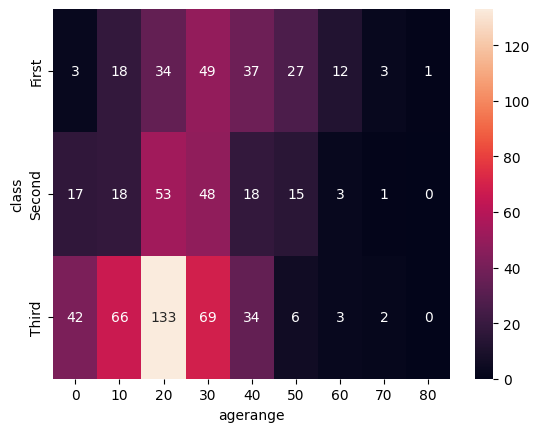

In [ ]:
sns.heatmap(titanic_pivot,annot=True,fmt='d')

In [ ]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

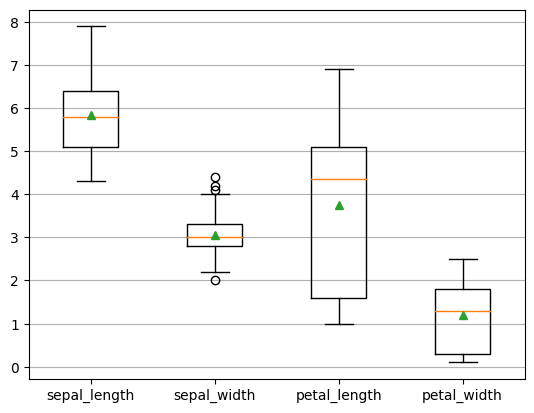

In [ ]:
#이상치 확인
plt.boxplot([iris['sepal_length'],iris['sepal_width'],iris['petal_length'],iris['petal_width']],
            labels=['sepal_length','sepal_width','petal_length','petal_width'],
            showmeans = True)
plt.grid(axis='y')
plt.show()

In [ ]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


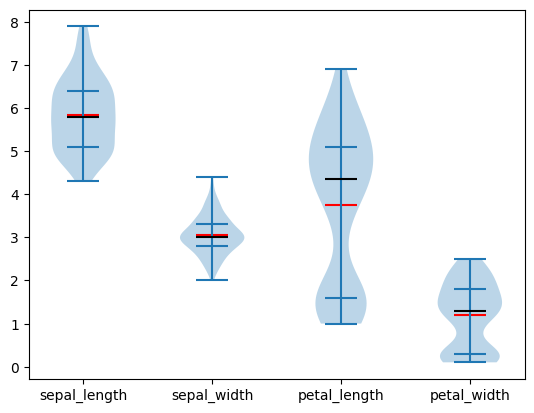

In [ ]:
v2 = plt.violinplot([iris['sepal_length'],iris['sepal_width'],iris['petal_length'],iris['petal_width']],
               showmeans=True,showmedians = True,quantiles =[[0.25,0.75],[0.25,0.75],[0.25,0.75],[0.25,0.75]] )
v2['cmeans'].set_edgecolor('r')
v2['cmedians'].set_edgecolor('k')
plt.xticks(range(1,5,1),labels=['sepal_length','sepal_width','petal_length','petal_width'])
plt.show()

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [8]:
#요일별 팁 평균
day_tip_mean = tips.groupby('day')['tip'].mean()

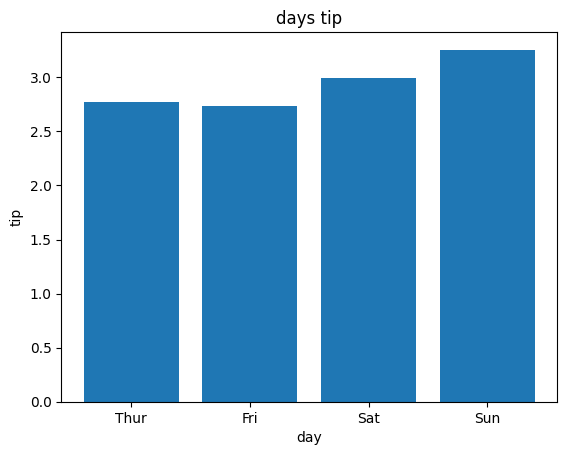

In [11]:
plt.bar(day_tip_mean.index,day_tip_mean)
plt.xlabel('day')
plt.ylabel('tip')
plt.title('days tip')
plt.show()

<ipython-input-16-a9345a855182>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=tips,x='day',y='tip',ci=None)


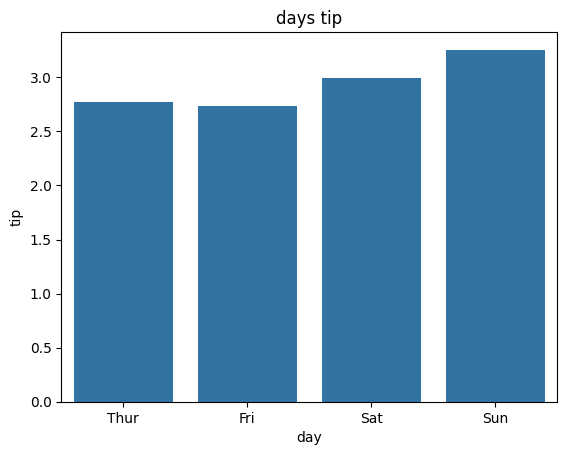

In [16]:
sns.barplot(data=tips,x='day',y='tip',ci=None)
plt.title('days tip')
plt.show()

In [17]:
#요일별 팁 합계
day_tip_sum = tips.groupby('day')['tip'].sum()
day_tip_sum

day
Thur    171.83
Fri      51.96
Sat     260.40
Sun     247.39
Name: tip, dtype: float64

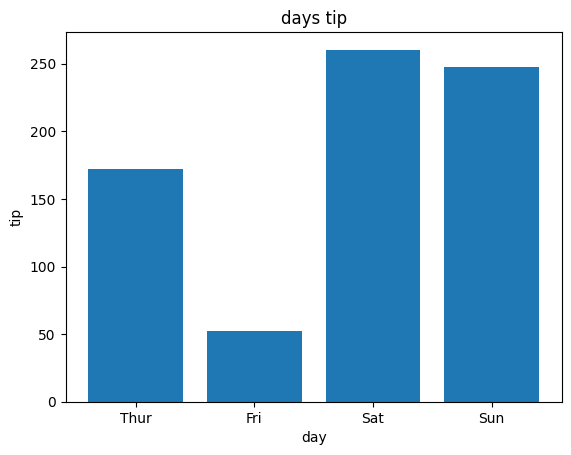

In [18]:
plt.bar(day_tip_sum.index,day_tip_sum)
plt.xlabel('day')
plt.ylabel('tip')
plt.title('days tip')
plt.show()

<ipython-input-20-5d033864875a>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=tips,x='day',y='tip',ci=None,estimator=sum)


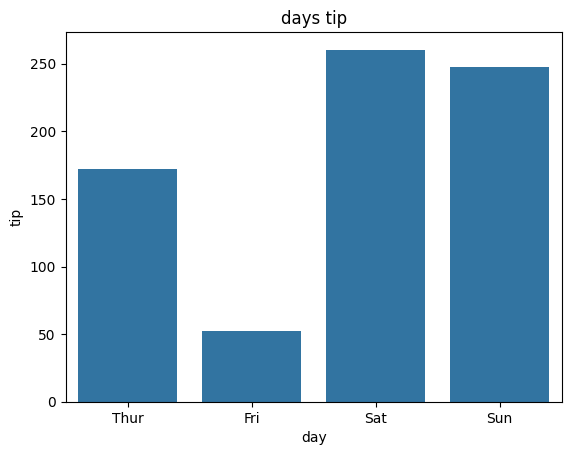

In [20]:
sns.barplot(data=tips,x='day',y='tip',ci=None,estimator=sum)
plt.title('days tip')
plt.show()

<ipython-input-24-201a014222cd>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=tips,x='day',y='tip',ci=None,estimator=sum,hue = 'smoker',


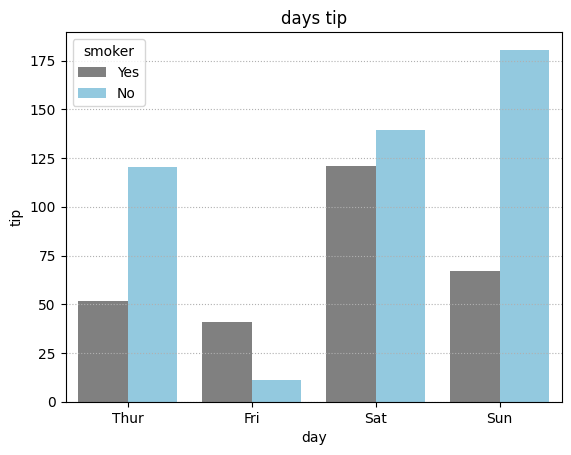

In [24]:
#요일별 팁 합계를 흡연여부로 비교
sns.barplot(data=tips,x='day',y='tip',ci=None,estimator=sum,hue = 'smoker',
            palette = {'Yes':'gray','No':'skyblue'})
plt.title('days tip')
plt.grid(axis='y', ls=":")
plt.show()